## Word Embeddings

Word embeddings - training, usage and visualization


### Packages

We will use `gensim` for word embeddings and `nltk` for some data processing tasks. Also a logger, `matplotlib` for visualisation and `sklearn` for representations.

In [0]:
# import libraries and set up logging
import gensim 
import nltk
import logging
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


##### Dataset: Game of Thrones books

The data used is five volumes of Game of Thrones downloaded from
https://github.com/nihitx/game-of-thrones- 

Basic data cleaning was applied on the raw data to speed up the process.

In [4]:
# Open the file and print the first line
dataFile="got/got.5books.clean.txt"

with open (dataFile, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break


b'"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are dead."\n'


#### Read files into a list `gensim.utils.simple_preprocess(sentence)`

(https://radimrehurek.com/gensim/utils.html). 



In [5]:
# Write a function `readInput(inputFile)` that reads a file and applies the `simple_preprocess`
def readInput(inputFile):
    """Method to read the input file"""
    
    logging.info("reading file {0}...this may take a while if the file is big".format(inputFile))    
    with open (inputFile, 'rb') as f:
        for i, line in enumerate (f): 
            if (i%10000==0):
                logging.info ("read {0} lines".format (i))
            yield gensim.utils.simple_preprocess(line)

# read the tokenized file into a list (sentences) of lists (tokens) named `sentences`
sentences = list(readInput (dataFile))
logging.info ("Done reading data file")  

# print some examples
print(sentences[2])

['gared', 'did', 'not', 'rise', 'to', 'the', 'bait', 'he', 'was', 'an', 'old', 'man', 'past', 'fifty', 'and', 'he', 'had', 'seen', 'the', 'lordlings', 'come', 'and', 'go', 'dead', 'is', 'dead', 'he', 'said', 'we', 'have', 'no', 'business', 'with', 'the', 'dead']


In [6]:
print(sentences[0:15])

[['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead'], ['do', 'the', 'dead', 'frighten', 'you', 'ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'smile'], ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait', 'he', 'was', 'an', 'old', 'man', 'past', 'fifty', 'and', 'he', 'had', 'seen', 'the', 'lordlings', 'come', 'and', 'go', 'dead', 'is', 'dead', 'he', 'said', 'we', 'have', 'no', 'business', 'with', 'the', 'dead'], ['are', 'they', 'dead', 'royce', 'asked', 'softly', 'what', 'proof', 'have', 'we'], ['will', 'saw', 'them', 'gared', 'said', 'if', 'he', 'says', 'they', 'are', 'dead', 'that', 'proof', 'enough', 'for', 'me'], ['will', 'had', 'known', 'they', 'would', 'drag', 'him', 'into', 'the', 'quarrel', 'sooner', 'or', 'later', 'he', 'wished', 'it', 'had', 'been', 'later', 'rather', 'than', 'sooner', 'my', 'mother', 'told', 'me', 'that', 'dead', 'men', 'sing', '

##### Training the Word2Vec model

Instantiate FastText and pass the data, a list (sentences) of lists (tokens) for a complete corpus. Word2Vec uses all these tokens to internally create a vocabulary.

In [0]:
# Define a basic FastText model (gensim.models.FastText) with Skip-gram and train (model.train) it on `sentences`
model = gensim.models.FastText(size=300, window=10, min_count=3, workers=2, sg=1)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=50)

In [67]:
model.epochs

50

### What have you trained?
Several functions allow to explore the results. The `most_similar` function returns the top 10 similar words to a given input word. `similarity` returns the similarity between two words that are present in the vocabulary. `doesnt_match` returns the most dissimilar word with a list of words. Let's play with these functions.


In [68]:
# Chose a word to see the 10 closest words
w1 = "throne"
model.wv.most_similar(positive=w1)


[('thrones', 0.5612598061561584),
 ('iron', 0.5444526672363281),
 ('throngs', 0.43164411187171936),
 ('barbs', 0.4189721643924713),
 ('throng', 0.381265252828598),
 ('derives', 0.3394731283187866),
 ('dynasty', 0.33811068534851074),
 ('joffrey', 0.3311784267425537),
 ('councillors', 0.3302787244319916),
 ('sits', 0.32510432600975037)]

In [69]:
w1 = "king"
model.wv.most_similar(positive=w1)

[('landing', 0.5545320510864258),
 ('reigns', 0.3979162573814392),
 ('landings', 0.37615370750427246),
 ('norcross', 0.3737821578979492),
 ('joffrey', 0.37256884574890137),
 ('iii', 0.36442166566848755),
 ('properties', 0.3604243993759155),
 ('styling', 0.3601350784301758),
 ('robert', 0.3594052493572235),
 ('duncan', 0.3543968200683594)]

What happens if the word is not in the vocabulary? We are using a tiny corpus in a specific domain...

In [70]:
# a word that does not belong to the corpus to see the 10 closest words
w1 = ["nigeria"]
model.wv.most_similar(positive=w1,topn=6)


[('nymeria', 0.6733304858207703),
 ('ellaria', 0.45298951864242554),
 ('tiger', 0.4476979374885559),
 ('nymeros', 0.4094993472099304),
 ('nigh', 0.3971477746963501),
 ('desmera', 0.379547119140625)]

In [71]:
# get everything related to stuff on the bed
w1 = ["bed","sheet","pillow"]
w2 = ["water"]
model.wv.most_similar(positive=w1,negative=w2,topn=10)
#get things that are related in the provided context and provide negative examples to say what should not be considered as related 

[('pillowed', 0.5134162902832031),
 ('pillows', 0.5068846940994263),
 ('sheets', 0.42687901854515076),
 ('canopied', 0.403844952583313),
 ('blankets', 0.39595386385917664),
 ('featherbed', 0.39369818568229675),
 ('blanket', 0.3636663258075714),
 ('sash', 0.35242193937301636),
 ('nude', 0.3496561646461487),
 ('mattress', 0.3410162329673767)]

In [72]:
model.wv.most_similar(positive=w1,topn=10)

[('pillowed', 0.5860333442687988),
 ('pillows', 0.5796939134597778),
 ('sheets', 0.49943530559539795),
 ('featherbed', 0.47294992208480835),
 ('canopied', 0.46085798740386963),
 ('blanket', 0.4318619966506958),
 ('blankets', 0.43037885427474976),
 ('sash', 0.42601269483566284),
 ('mattress', 0.4130558371543884),
 ('nude', 0.41200220584869385)]

Calculate some similarities now

In [73]:
# similarity between two different words
model.wv.similarity(w1="king",w2="queen")

0.3169219

In [74]:
# similarity between two different words
model.wv.similarity(w1="water",w2="river")

0.3030795

In [75]:
# similarity between opposite words
model.wv.similarity(w1="dirty",w2="clean")

0.21345134

In [76]:
# similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

1.0

In [77]:
# similarity between two unrelated words
model.wv.similarity(w1="bed",w2="cow")

0.20457818

#### Find the odd one out


In [78]:
# Define a list of words and look for the strange word
# Which one is the odd one out in this list?
model.wv.doesnt_match(["snow","winter","sword"])

'sword'

In [79]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])


'duvet'

#### Data processing


Let's see what does stemming, part-of-speech tagging and lemmatisation to our corpus.

### Stemming with Porter Stemmer

In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# initialise the stemmer
porterStemmer=PorterStemmer()

In [81]:
# Let's see the first sentence before and after stemming to understand what we are doing
stemSentence=[]
print(sentences[0])
for word in sentences[0]:
    stemSentence.append(porterStemmer.stem(word))
print(stemSentence)
    

['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']
['we', 'should', 'start', 'back', 'gare', 'urg', 'as', 'the', 'wood', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildl', 'are', 'dead']


In [82]:
# It's OK, let's do the whole corpus
# Stem the full corpys
stemmedSentences=[]
for line in sentences:
    stemSentence=[]
    for word in line:
        stemSentence.append(porterStemmer.stem(word))
    stemmedSentences.append(stemSentence)
example=16169
print(sentences[example])
print(stemmedSentences[example])

['she', 'will', 'without', 'highgarden', 'the', 'lannisters', 'have', 'no', 'hope', 'of', 'keeping', 'joffrey', 'on', 'his', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'asks', 'she', 'will', 'have', 'no', 'choice', 'but', 'to', 'grant', 'his', 'request']
['she', 'will', 'without', 'highgarden', 'the', 'lannist', 'have', 'no', 'hope', 'of', 'keep', 'joffrey', 'on', 'hi', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'ask', 'she', 'will', 'have', 'no', 'choic', 'but', 'to', 'grant', 'hi', 'request']


### Word embeddings on the stemmed corpus

In [0]:
# Another training with FastText, now with stems `modelStems`
modelStems = gensim.models.FastText(size=300, window=10, min_count=3, workers=2, sg=1)
modelStems.build_vocab(stemmedSentences)
modelStems.train(stemmedSentences, total_examples=modelStems.corpus_count, epochs=50)

Explore similarities in `modelStems`

In [85]:
w1 = "throne"
model.wv.most_similar(positive=w1)


[('thrones', 0.5612598061561584),
 ('iron', 0.5444526672363281),
 ('throngs', 0.43164411187171936),
 ('barbs', 0.4189721643924713),
 ('throng', 0.381265252828598),
 ('derives', 0.3394731283187866),
 ('dynasty', 0.33811068534851074),
 ('joffrey', 0.3311784267425537),
 ('councillors', 0.3302787244319916),
 ('sits', 0.32510432600975037)]

In [86]:
w1="sword"
modelStems.wv.most_similar (positive=w1)


[('blade', 0.4977814555168152),
 ('longsword', 0.48358970880508423),
 ('shortsword', 0.45538997650146484),
 ('unsheath', 0.405608594417572),
 ('steel', 0.3960208296775818),
 ('hilt', 0.3850322961807251),
 ('whetston', 0.37219691276550293),
 ('sheath', 0.3621333837509155),
 ('swordpoint', 0.3483949899673462),
 ('swordfight', 0.34485164284706116)]

In [87]:
model.wv.most_similar("sword")

[('shortsword', 0.488616406917572),
 ('blade', 0.4822026491165161),
 ('hilt', 0.45454803109169006),
 ('longsword', 0.4404366612434387),
 ('swordfight', 0.4395459294319153),
 ('scabbard', 0.4325196146965027),
 ('swordpoint', 0.4133822023868561),
 ('swordsman', 0.4033955931663513),
 ('greatsword', 0.3971710503101349),
 ('sheathe', 0.3900507986545563)]

#### Lemmatisation with a WordNet lemmatiser



In [88]:
# Import the package and initialise the lemmatiser
# We need to download Wordnet too
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lemmatiser = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
# Let's see the first sentence before and after lemmatising
lemSentence=[]
print(sentences[0])
for word in sentences[0]:
    lemSentence.append(lemmatiser.lemmatize(word))
print(lemSentence)

['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']
['we', 'should', 'start', 'back', 'gared', 'urged', 'a', 'the', 'wood', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']


Are you happy with that? The `lemmatize(word)` function also allow to include information about the PoS of the word `lemmatize(word, PoS)`. Let's us it!

In [90]:
!pip install nltk

In [91]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [92]:
# Imports needed for PoS tagging
from nltk import pos_tag
from nltk.corpus import wordnet

# You might need to download this
#nltk.download('averaged_perceptron_tagger')

# Write a function to map PoS tag in wordnet to the first letter only
def getWordnetPoS(word):
    """Map POS tag to first character lemmatize() accepts"""
    # WordNet POS tags are only: NOUN = 'n', ADJ = 's', VERB = 'v', ADV = 'r', ADJ_SAT = 'a'

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tagDict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tagDict.get(tag, wordnet.NOUN)

# Tag with PoS the first sentence of the corpus and print it
print(sentences[0])
posSentence=[]
for word in sentences[0]:
    posSentence.append(getWordnetPoS(word))
print(posSentence)

# Lemmatise the full corpus with the information of PoS now
lemSentence=[]
for word in sentences[0]:
    lemSentence.append(lemmatiser.lemmatize(word, getWordnetPoS(word)))
print(lemSentence)

['we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead']
['n', 'n', 'n', 'r', 'v', 'v', 'n', 'n', 'n', 'v', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'v', 'a']
['we', 'should', 'start', 'back', 'gared', 'urge', 'a', 'the', 'wood', 'begin', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'be', 'dead']


In [93]:
# It's OK, let's lemmatise the whole corpus
lemSentences=[]
for line in sentences:
    lemSentence=[]
    for word in line:
        lemSentence.append(lemmatiser.lemmatize(word, getWordnetPoS(word)))
    lemSentences.append(lemSentence)
print(sentences[example])
print(lemSentences[example])


['she', 'will', 'without', 'highgarden', 'the', 'lannisters', 'have', 'no', 'hope', 'of', 'keeping', 'joffrey', 'on', 'his', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'asks', 'she', 'will', 'have', 'no', 'choice', 'but', 'to', 'grant', 'his', 'request']
['she', 'will', 'without', 'highgarden', 'the', 'lannisters', 'have', 'no', 'hope', 'of', 'keep', 'joffrey', 'on', 'his', 'throne', 'if', 'my', 'son', 'the', 'lord', 'oaf', 'asks', 'she', 'will', 'have', 'no', 'choice', 'but', 'to', 'grant', 'his', 'request']


### Word embeddings on the lemmatised corpus

In [0]:
# Another training with word2vec, now with lemmas, create the model `model Lemmas`
modelLemmas = gensim.models.FastText(size=300, window=10, min_count=3, workers=2, sg=1)
modelLemmas.build_vocab(lemSentences)
modelLemmas.train(lemSentences, total_examples=modelLemmas.corpus_count, epochs=50)

In [95]:
w1 = "throne"
modelLemmas.wv.most_similar(positive=w1)

[('iron', 0.5169459581375122),
 ('drone', 0.47100308537483215),
 ('barb', 0.38114166259765625),
 ('dispense', 0.3590146601200104),
 ('throng', 0.3437856435775757),
 ('crown', 0.33927100896835327),
 ('dynasty', 0.3348790407180786),
 ('usurp', 0.32642263174057007),
 ('rightful', 0.32355496287345886),
 ('aery', 0.32148444652557373)]

## Visualisation

Finally, we will visualise the _n_-dimensional word embeddings by projecting them down to 2-dimensional x,y coordinate pairs. 
Several techniques exist (PCA, t-SNE, etc). We use PCA in the following (PCA class in `sklearn.decomposition`)

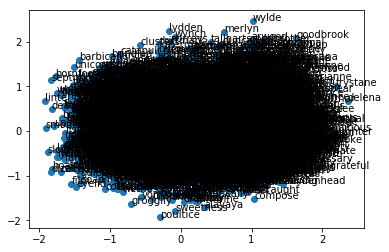

In [96]:
# Imports needed for the visualisation
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

# fit a 2d PCA model to the vectors
X = modelLemmas[modelLemmas.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

# add the labels to the plot
words = list(modelLemmas.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


Too much information. Let's select only a subset of words

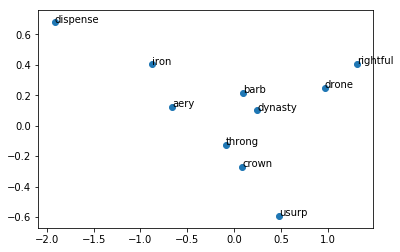

In [97]:
# Select what we wanna see ('most_similar' words to something for instance)
setToPlot = modelLemmas.wv.most_similar(positive='throne', topn=10)

# Look for the vectors for the desired words only, and store them as vectorX and vectorY
vectorX =  []
vectorY =  []
words = []
for word, sim in setToPlot:
    i=modelLemmas.wv.vocab[word].index
    words.append(word)
    vectorX.append(result[i,0])
    vectorY.append(result[i,1])
# create the scatter plot for these words
pyplot.scatter(vectorX, vectorY)

# add the labels
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(vectorX[i], vectorY[i]))
pyplot.show()

We can do many more things, but the best way to learn is parctice by yourself. 

I acknowledge and recommend the following pages:

https://radimrehurek.com/gensim/utils.html

https://radimrehurek.com/gensim/models/fasttext.html